In [14]:
import pickle
import datetime
import time
import ConfigParser

import pandas as pd
import numpy as np

from sqlalchemy import create_engine

import scipy

import tweepy

from nltk.tokenize.casual import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
NEG_TWEET = -1
POS_TWEET = 1
NEUT_TWEET = 0

In [66]:
tknzr = TweetTokenizer()
def tweet_tokenize(msg):
    return tknzr.tokenize(msg)

def remove_retweet(msg):
    return ' '.join(filter(lambda x:x[0]!='@' and not x.startswith('http'), msg.split()))
    
def rename_sentiment(s):
    if s == -1:
        return 'neg'
    elif s == 0:
        return 'neut'
    else:
        return 'pos'

In [16]:
def color_types(ttype):
    color = 'red' if ttype == 'neg' else 'green'
    return 'color: %s' % color

In [17]:
with open('webapp/models/model_sgd.pkl', 'rb') as f:
    model = pickle.load(f)

with open('webapp/models/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [37]:
SENTIMENT_THRESHOLD = 0.6
def convert_proba(p):
    if p[0] >= SENTIMENT_THRESHOLD:
        return NEG_TWEET
    elif p[1] >= SENTIMENT_THRESHOLD:
        return POS_TWEET
    else:
        return NEUT_TWEET

In [68]:
def plot_count(X):
    X['ttype'] = X['ttype'].apply(rename_sentiment)
    for p in np.arange(0.5, 0.7, 0.05):
        SENTIMENT_THRESHOLD = p
        universities = list(X['tuniversity'].unique())
        for u in universities:        
            plt.figure()

            ax = sns.countplot(x='ttype', data=X[X['tuniversity'] == u])
            plt.title(u + ' '+ str(p))

In [69]:
config = ConfigParser.ConfigParser()
config.read('webapp/config.ini')

['webapp/config.ini']

In [70]:
engine = create_engine('postgresql://%s:%s@localhost/tweets_db' %
                        (config.get('DatabaseLogin', 'login'), config.get('DatabaseLogin', 'password')))
X = pd.read_sql_table('tweets', engine)

In [71]:
X['ttype'] = np.apply_along_axis(convert_proba, 1, model.predict_proba(vectorizer.transform(X['ttext'].apply(remove_retweet))))

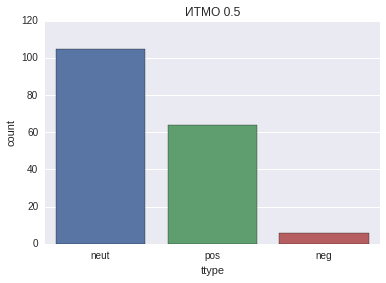

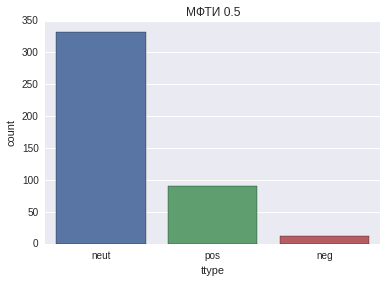

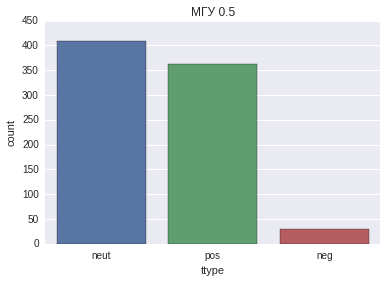

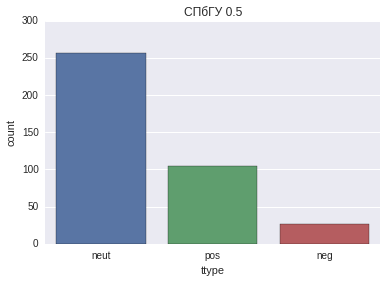

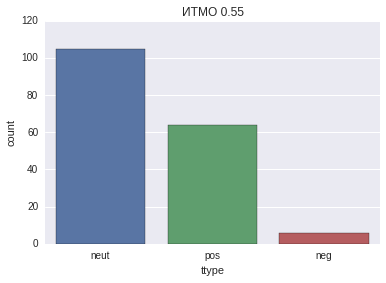

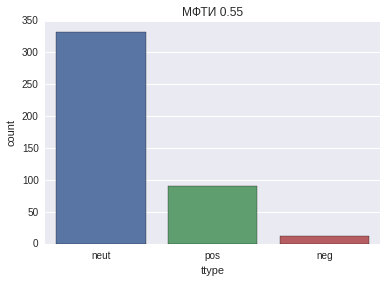

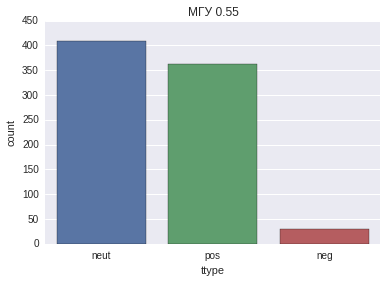

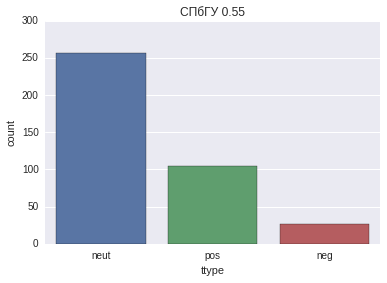

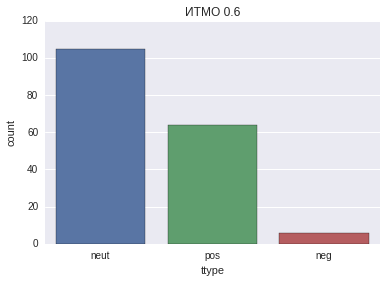

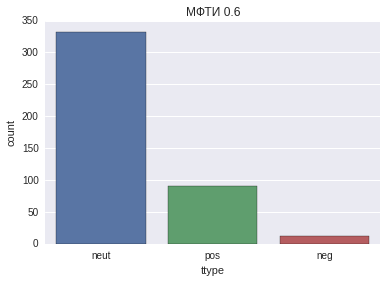

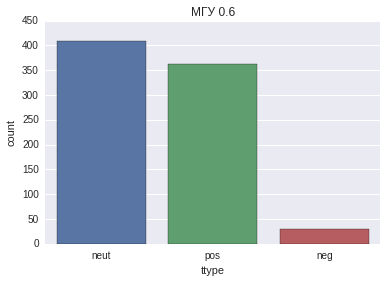

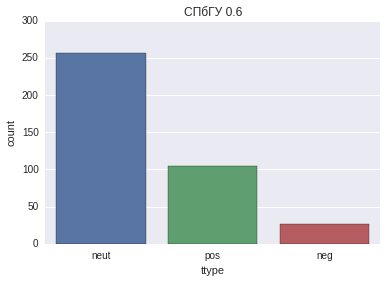

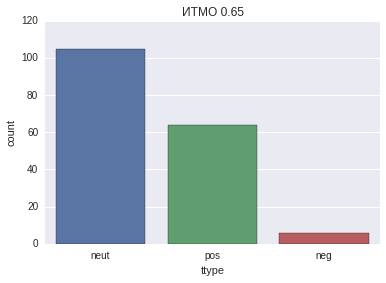

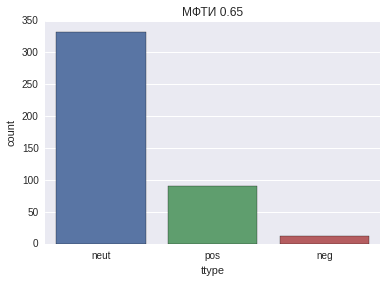

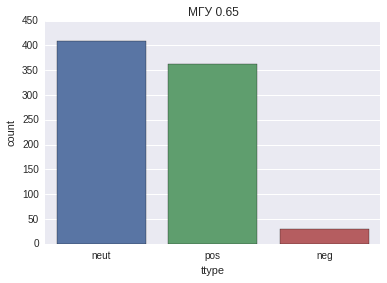

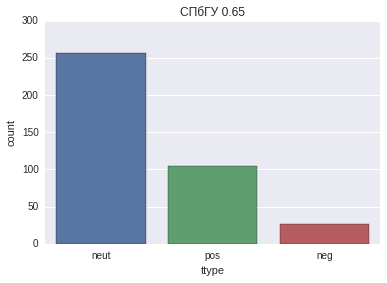

In [72]:
plot_count(X)